# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist

In [30]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
print(f'this dataset contains of {df.shape[0]} rows and {df.shape[1]} columns')

this dataset contains of 344 rows and 7 columns


In [6]:
# check missing values
round(df.isnull().sum()/len(df)*100,2)

species              0.00
island               0.00
culmen_length_mm     0.58
culmen_depth_mm      0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  2.91
dtype: float64

In [7]:
# check duplicate
df.duplicated().sum()

0

# Exploratory Data Analysis

In [8]:
eda = df.copy()

num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

## Univariate Analysis

In [9]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


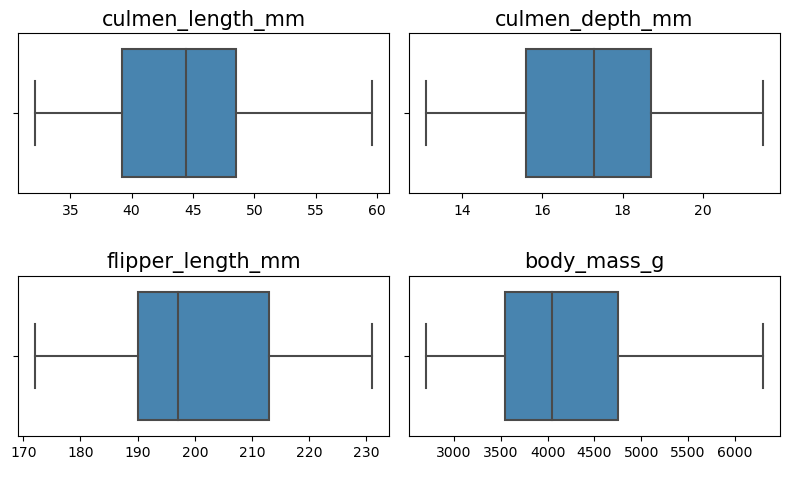

In [15]:
plt.figure(figsize=(8,5))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=eda[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

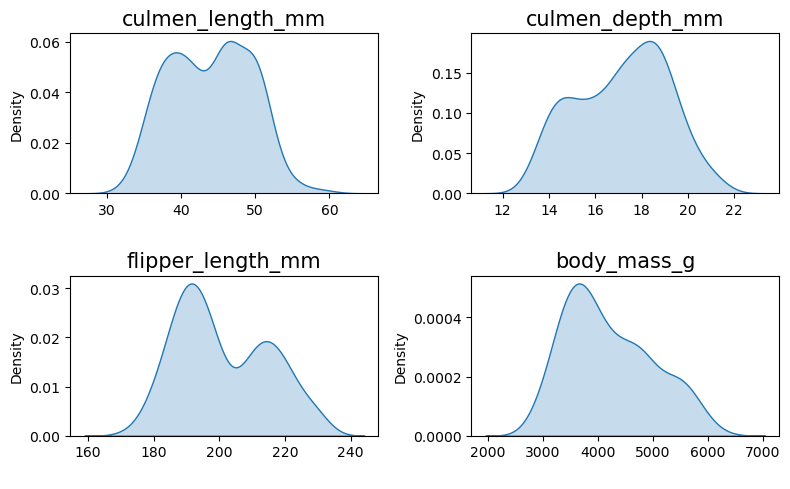

In [16]:
plt.figure(figsize=(8,5))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda[num[i]], palette='Blues_d', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

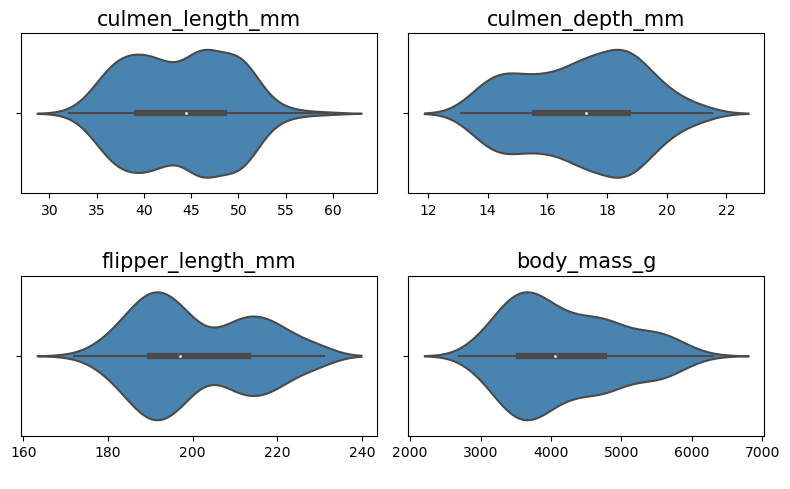

In [17]:
plt.figure(figsize=(8,5))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=eda[num[i]], palette='Blues_d', shade=True)
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

In [18]:
cat

Index(['species', 'island', 'sex'], dtype='object')

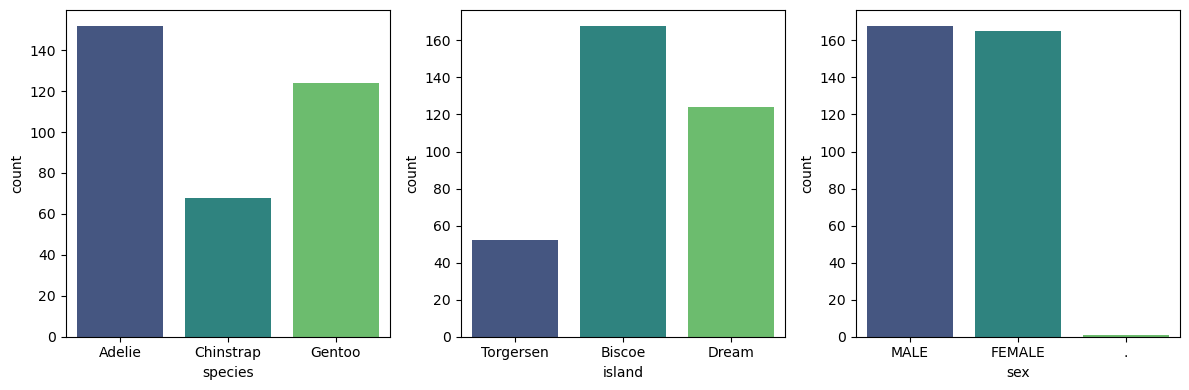

In [22]:
fig, axes = plt.subplots(1,3,figsize=(12,4))

sns.countplot(x=eda['species'], palette='viridis', ax=axes[0])
sns.countplot(x=eda['island'], palette='viridis', ax=axes[1])
sns.countplot(x=eda['sex'], palette='viridis', ax=axes[2])
plt.tight_layout()

## Bivariate Analysis

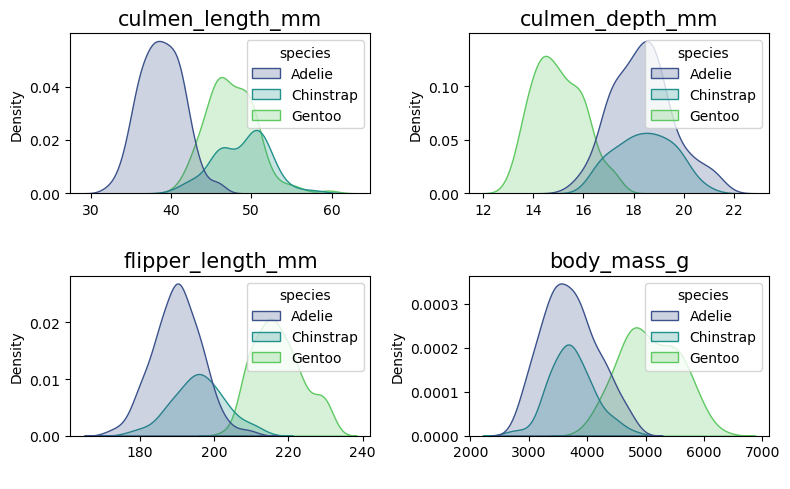

In [24]:
plt.figure(figsize=(8,5))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['species'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

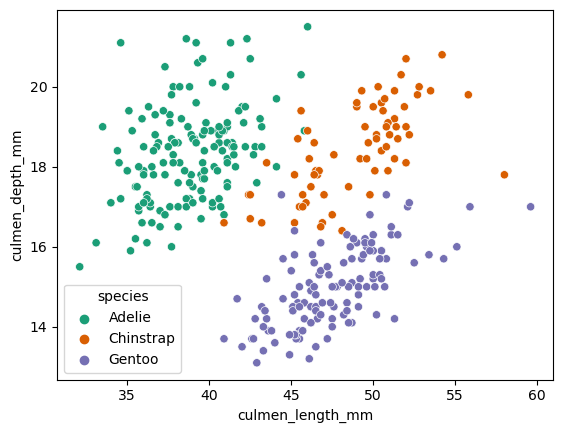

In [39]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

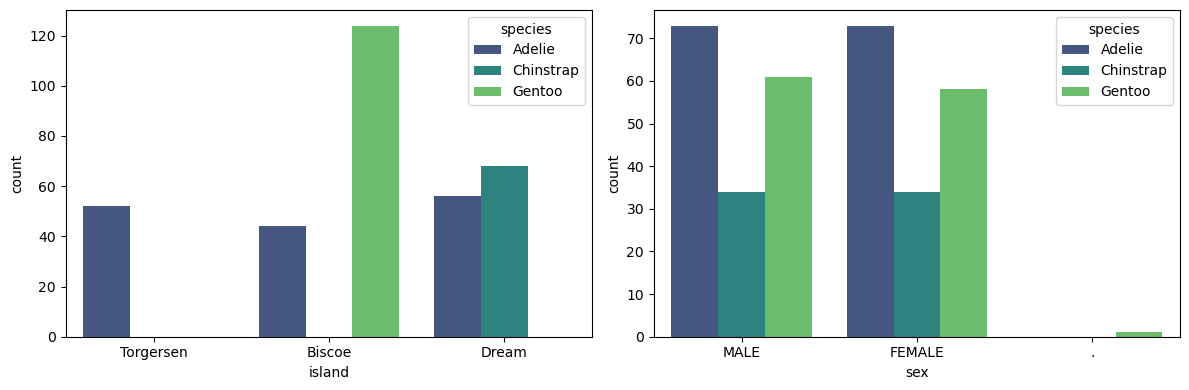

In [26]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x=eda['island'], palette='viridis', ax=axes[0], hue=eda['species'])
sns.countplot(x=eda['sex'], palette='viridis', ax=axes[1], hue=eda['species'])
plt.tight_layout()

## Multivariate

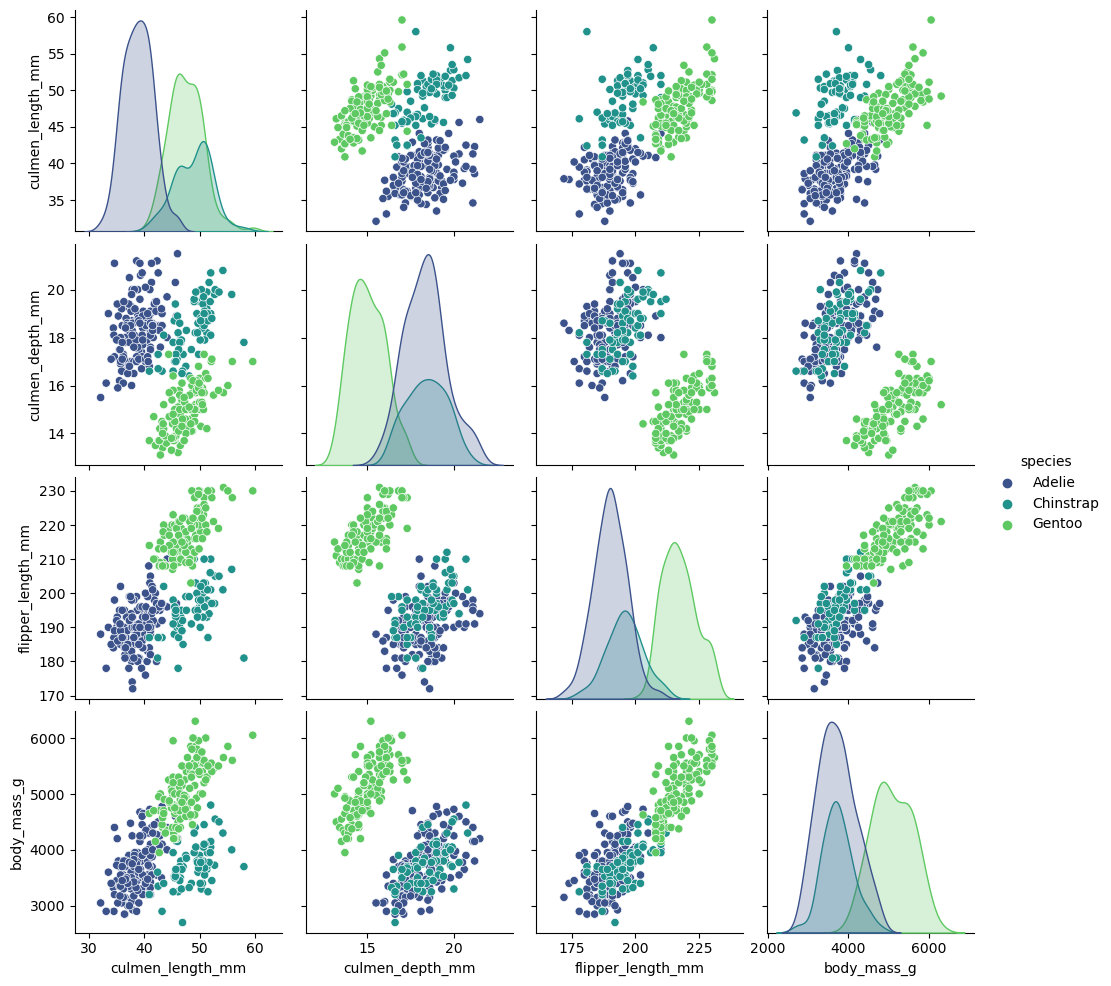

In [35]:
sns.pairplot(df,hue='species',palette='viridis')

# Data Pre Processing

## Data Cleaning

In [31]:
df.dropna(axis=0, inplace=True)

In [33]:
# check missing values
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Feature Encoding

In [40]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


## Train Test Split

In [41]:
X = X
y = df['species']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modeling

## Standard Model

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# fit
model.fit(X_train,y_train)

base_pred = model.predict(X_test)

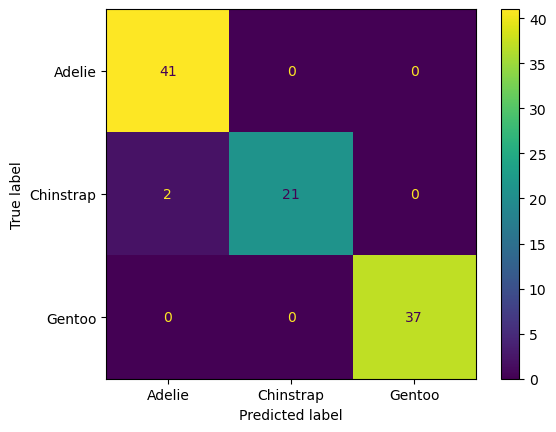

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

plot_confusion_matrix(model,X_test,y_test)

In [49]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101



In [50]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.344548
culmen_depth_mm,0.042040
flipper_length_mm,0.542829
body_mass_g,0.002398
island_Dream,0.068185
island_Torgersen,0.000000
sex_FEMALE,0.000000
sex_MALE,0.000000


## Hyperparameter with Visualization

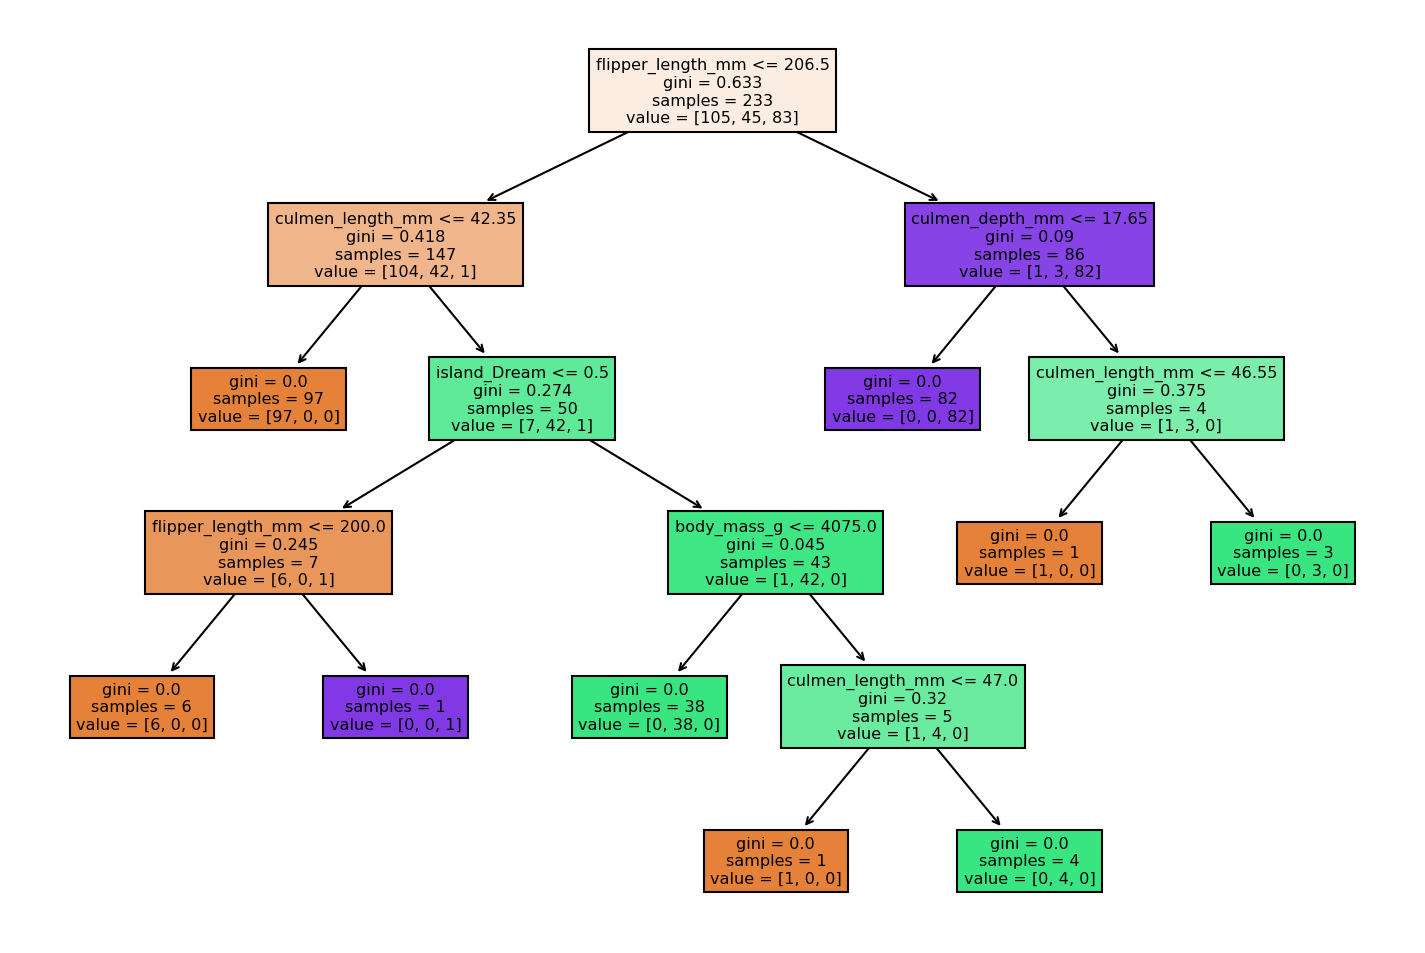

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [53]:
# we create a function that reports back classification results and plots out the tree
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

### Max Depth = 2

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





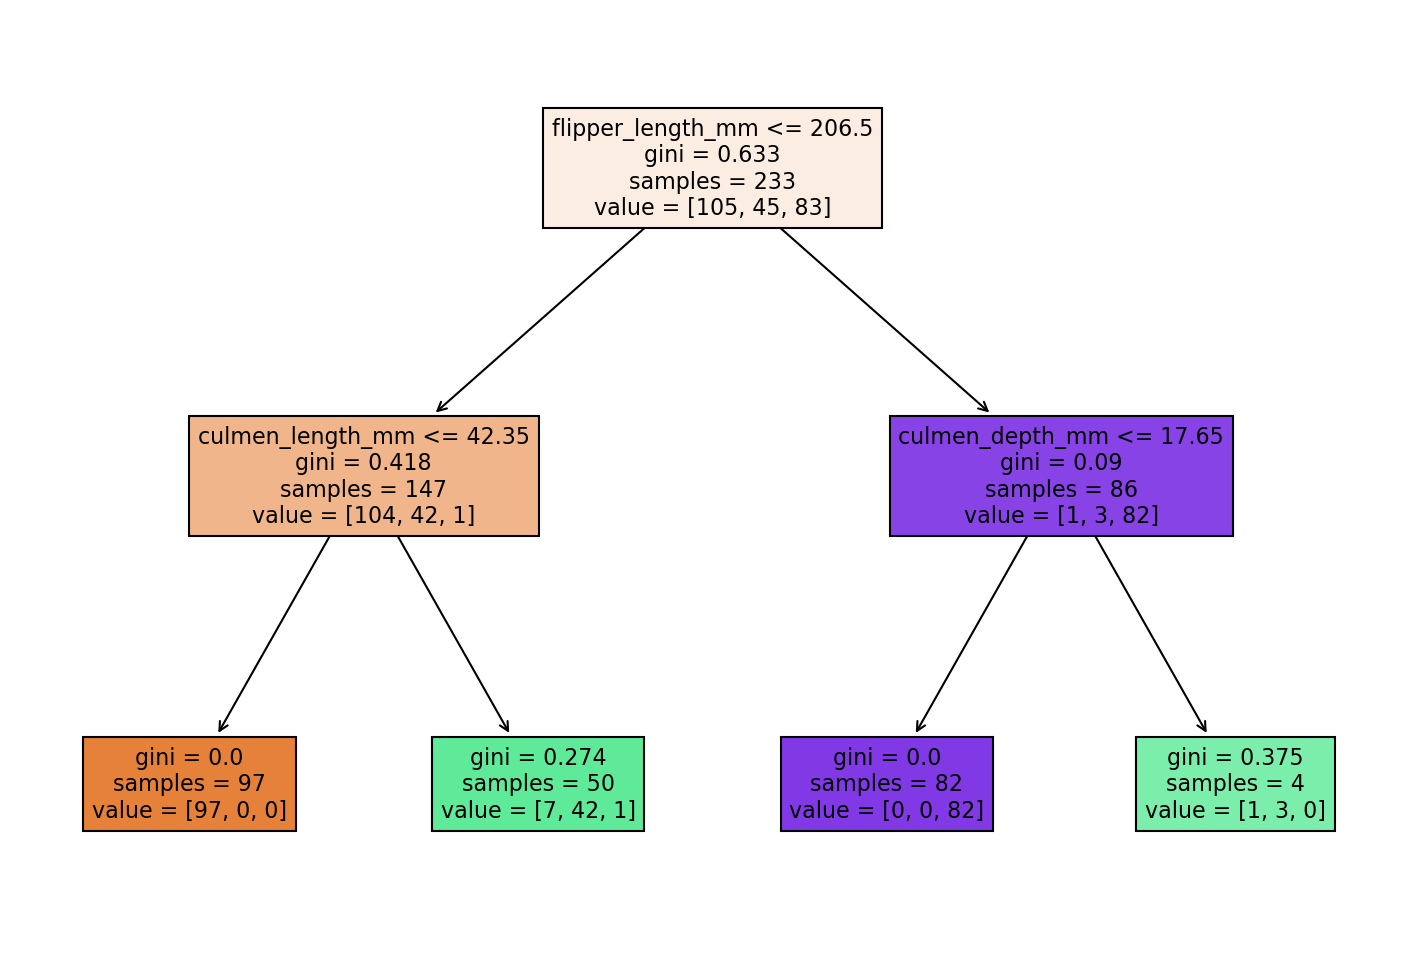

In [55]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

### Max Leaf Nodes = 3

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





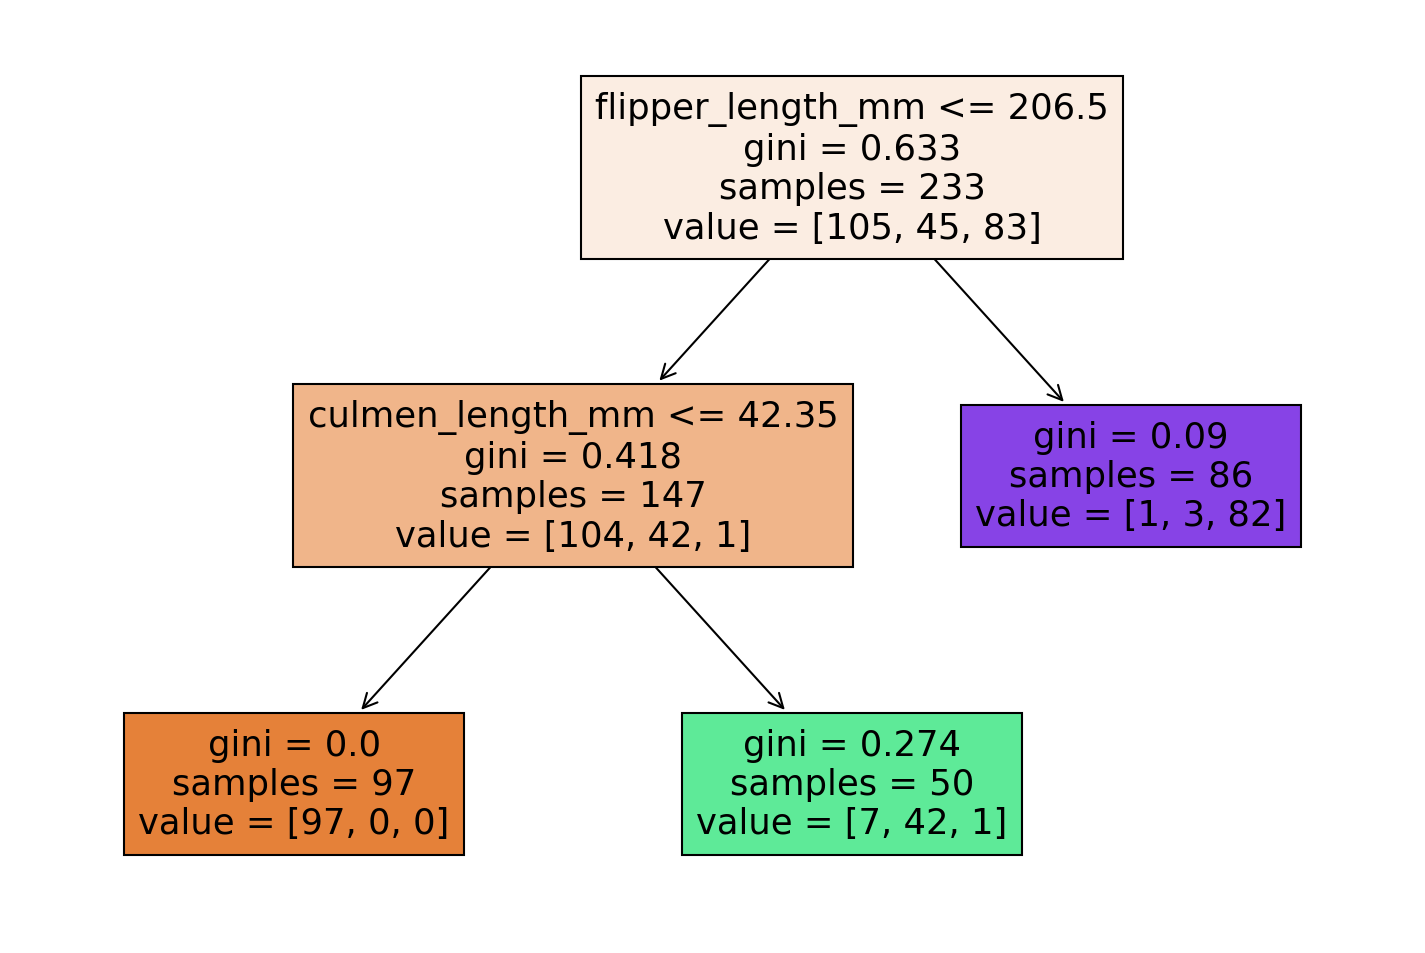

In [56]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

### Criterion = entropy

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101





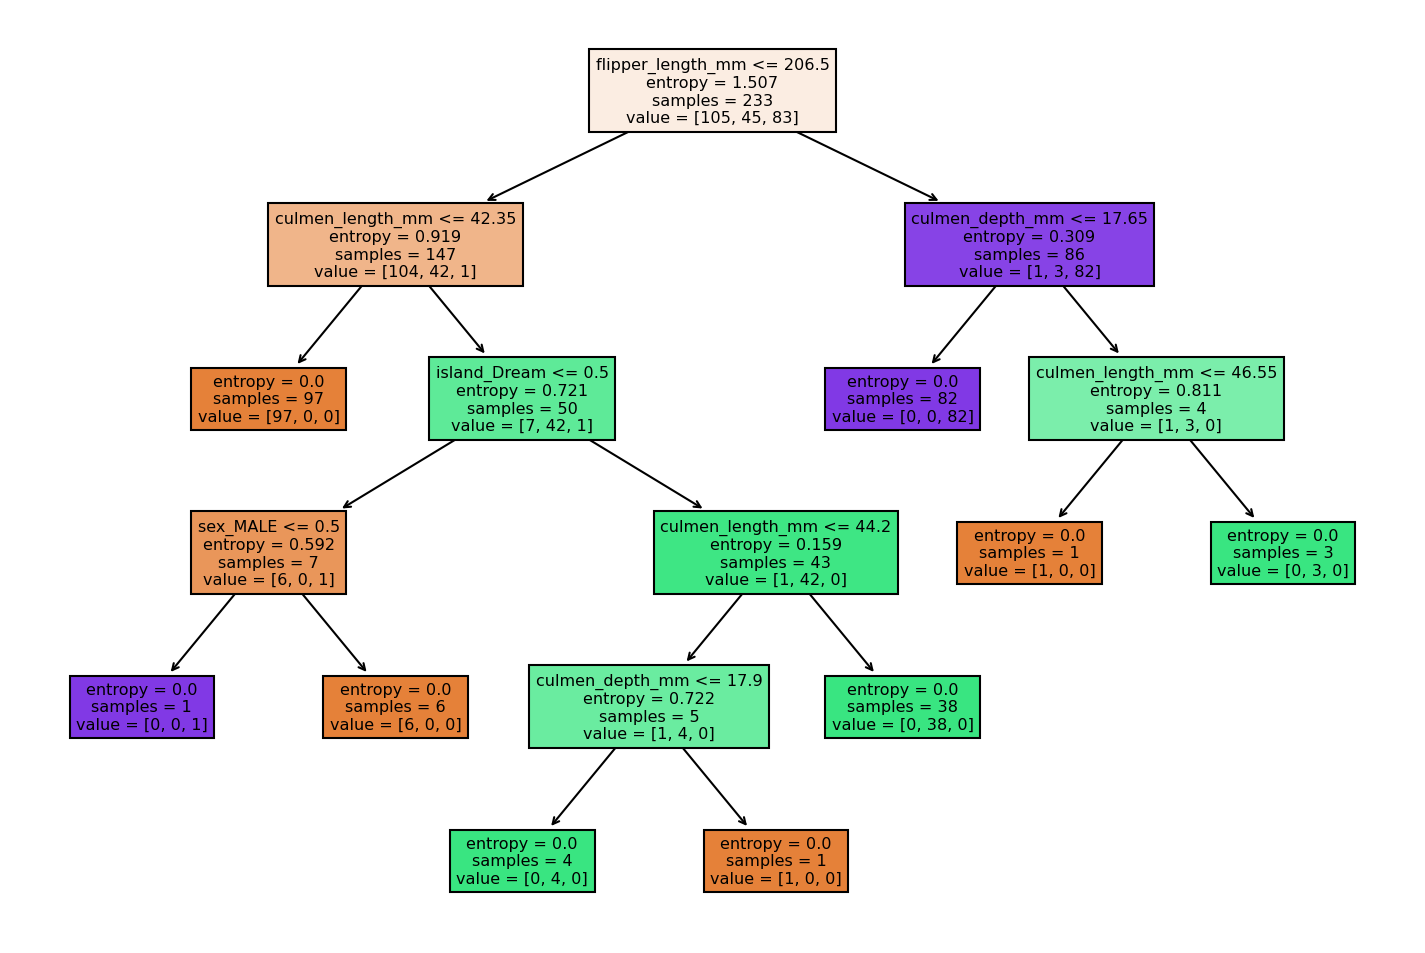

In [57]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)